In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, train_size = 60000, random_state = 7)

In [7]:
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)


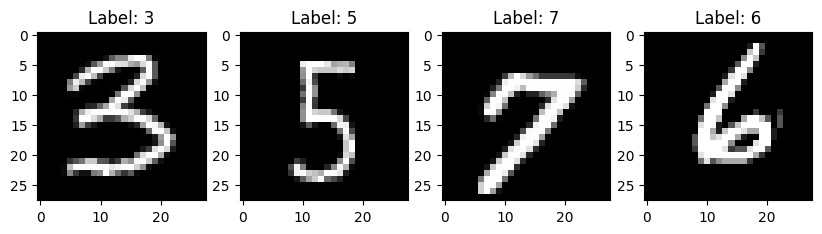

In [8]:
fig, axes = plt.subplots(1, 4, figsize=(10, 3))

for i in range(4):
    axes[i].imshow(X_train[i], cmap=plt.get_cmap('gray'))
    axes[i].set_title(f'Label: {y_train[i]}')

plt.show()

In [9]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255
print('Shape of transformed X train:', X_train.shape)

Shape of transformed X train: (60000, 784)


In [10]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('Shape of transformed y train:', y_train.shape)
num_classes = y_train.shape[1]

Shape of transformed y train: (60000, 10)


In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [13]:
model_01 = Sequential()
model_01.add(Dense(units=num_classes,input_dim=num_pixels, activation='softmax'))
model_01.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_01.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
H = model_01.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size = 512
)

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.2095 - loss: 2.2063 - val_accuracy: 0.6653 - val_loss: 1.5891
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6920 - loss: 1.4764 - val_accuracy: 0.7613 - val_loss: 1.1972
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7728 - loss: 1.1430 - val_accuracy: 0.7987 - val_loss: 0.9912
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8014 - loss: 0.9647 - val_accuracy: 0.8177 - val_loss: 0.8671
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8211 - loss: 0.8510 - val_accuracy: 0.8283 - val_loss: 0.7843
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8318 - loss: 0.7777 - val_accuracy: 0.8390 - val_loss: 0.7248
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8396 - loss: 0.7273 - val_accuracy: 0.8442 - val_loss: 0.6802
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8461 - loss: 0.6806 - val_acc

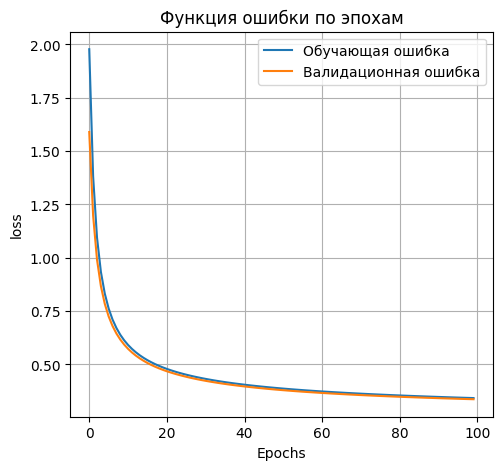

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(H.history['loss'], label='Обучающая ошибка')
plt.plot(H.history['val_loss'], label='Валидационная ошибка')
plt.title('Функция ошибки по эпохам')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)

In [16]:
scores=model_01.evaluate(X_test,y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9079 - loss: 0.3455
Loss on test data: 0.3511466085910797
Accuracy on test data: 0.9067999720573425


In [17]:
model_01_100 = Sequential()
model_01_100.add(Dense(units=100,input_dim=num_pixels, activation='sigmoid'))
model_01_100.add(Dense(units=num_classes, activation='softmax'))
model_01_100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_01_100.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
H_01_100 = model_01_100.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size = 512
)

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1144 - loss: 2.3654 - val_accuracy: 0.3688 - val_loss: 2.1933
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4250 - loss: 2.1612 - val_accuracy: 0.5125 - val_loss: 2.0693
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5401 - loss: 2.0408 - val_accuracy: 0.5837 - val_loss: 1.9510
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6047 - loss: 1.9234 - val_accuracy: 0.6332 - val_loss: 1.8370
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6477 - loss: 1.8073 - val_accuracy: 0.6737 - val_loss: 1.7282
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6824 - loss: 1.7042 - val_accuracy: 0.6938 - val_loss: 1.6254
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7016 - loss: 1.6027 - val_accuracy: 0.7125 - val_loss: 1.5291
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7249 - loss: 1.5062 - val_acc

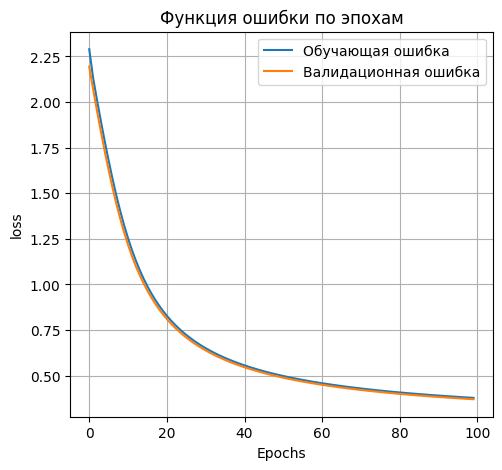

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(H_01_100.history['loss'], label='Обучающая ошибка')
plt.plot(H_01_100.history['val_loss'], label='Валидационная ошибка')
plt.title('Функция ошибки по эпохам')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)

In [20]:
scores_01_100=model_01_100.evaluate(X_test,y_test)
print('Loss on test data:', scores_01_100[0])
print('Accuracy on test data:', scores_01_100[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8996 - loss: 0.3781
Loss on test data: 0.3824511766433716
Accuracy on test data: 0.9000999927520752


In [21]:
model_01_300 = Sequential()
model_01_300.add(Dense(units=300,input_dim=num_pixels, activation='sigmoid'))
model_01_300.add(Dense(units=num_classes, activation='softmax'))
model_01_300.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_01_300.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,510 (931.68 KB)

 Trainable params: 238,510 (931.68 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
H_01_300 = model_01_300.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size = 512
)

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1505 - loss: 2.3045 - val_accuracy: 0.4097 - val_loss: 2.1516
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4658 - loss: 2.1130 - val_accuracy: 0.6090 - val_loss: 2.0029
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6184 - loss: 1.9658 - val_accuracy: 0.6613 - val_loss: 1.8630
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6724 - loss: 1.8277 - val_accuracy: 0.6930 - val_loss: 1.7323
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7051 - loss: 1.6994 - val_accuracy: 0.7148 - val_loss: 1.6098
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7326 - loss: 1.5800 - val_accuracy: 0.7342 - val_loss: 1.4971
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7469 - loss: 1.4727 - val_accuracy: 0.7588 - val_loss: 1.3944
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7653 - loss: 1.3697 - val_acc

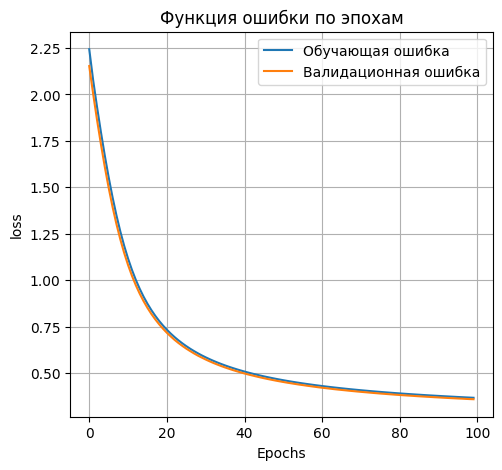

In [23]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(H_01_300.history['loss'], label='Обучающая ошибка')
plt.plot(H_01_300.history['val_loss'], label='Валидационная ошибка')
plt.title('Функция ошибки по эпохам')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)

In [24]:
scores_01_300=model_01_300.evaluate(X_test,y_test)
print('Loss on test data:', scores_01_300[0])
print('Accuracy on test data:', scores_01_300[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9016 - loss: 0.3667
Loss on test data: 0.37091827392578125
Accuracy on test data: 0.9013000130653381


In [25]:
model_01_500 = Sequential()
model_01_500.add(Dense(units=500,input_dim=num_pixels, activation='sigmoid'))
model_01_500.add(Dense(units=num_classes, activation='softmax'))
model_01_500.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_01_500.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 397,510 (1.52 MB)

 Trainable params: 397,510 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
H_01_500 = model_01_500.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size = 512
)

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.2209 - loss: 2.2701 - val_accuracy: 0.4380 - val_loss: 2.1357
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5175 - loss: 2.0961 - val_accuracy: 0.5918 - val_loss: 1.9738
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6221 - loss: 1.9347 - val_accuracy: 0.6730 - val_loss: 1.8232
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6893 - loss: 1.7883 - val_accuracy: 0.7188 - val_loss: 1.6837
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7225 - loss: 1.6534 - val_accuracy: 0.7382 - val_loss: 1.5557
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7488 - loss: 1.5271 - val_accuracy: 0.7690 - val_loss: 1.4384
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7682 - loss: 1.4134 - val_accuracy: 0.7788 - val_loss: 1.3334
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7841 - loss: 1.3139 - val_acc

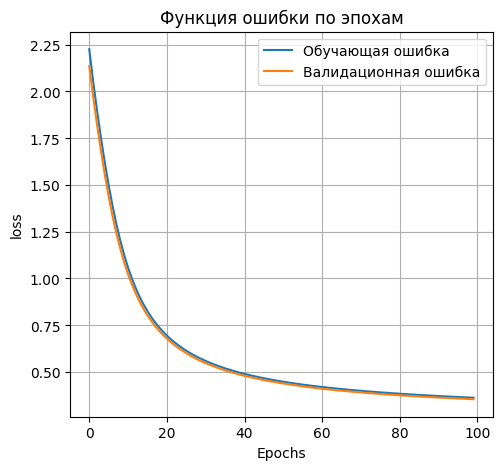

In [27]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(H_01_500.history['loss'], label='Обучающая ошибка')
plt.plot(H_01_500.history['val_loss'], label='Валидационная ошибка')
plt.title('Функция ошибки по эпохам')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)

In [28]:
scores_01_500=model_01_500.evaluate(X_test,y_test)
print('Loss on test data:',scores_01_500[0]) #значение функции ошибки
print('Accuracy on test data:',scores_01_500[1]) #значение метрики качества

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9007 - loss: 0.3635
Loss on test data: 0.36660370230674744
Accuracy on test data: 0.9010000228881836


In [29]:
model_01_300_50 = Sequential()
model_01_300_50.add(Dense(units=300, input_dim=num_pixels, activation='sigmoid'))
model_01_300_50.add(Dense(units=50, activation='sigmoid'))
model_01_300_50.add(Dense(units=num_classes, activation='softmax'))
model_01_300_50.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_01_300_50.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 50)             │        15,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,060 (980.70 KB)

 Trainable params: 251,060 (980.70 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
H_01_300_50 = model_01_300_50.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=512
)

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.1039 - loss: 2.3373 - val_accuracy: 0.1325 - val_loss: 2.2951
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1429 - loss: 2.2919 - val_accuracy: 0.1357 - val_loss: 2.2808
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1592 - loss: 2.2776 - val_accuracy: 0.1543 - val_loss: 2.2670
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1845 - loss: 2.2641 - val_accuracy: 0.2415 - val_loss: 2.2531
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2785 - loss: 2.2490 - val_accuracy: 0.3228 - val_loss: 2.2384
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3247 - loss: 2.2347 - val_accuracy: 0.3753 - val_loss: 2.2231
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3946 - loss: 2.2195 - val_accuracy: 0.4215 - val_loss: 2.2068
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4341 - loss: 2.2029 - val_acc

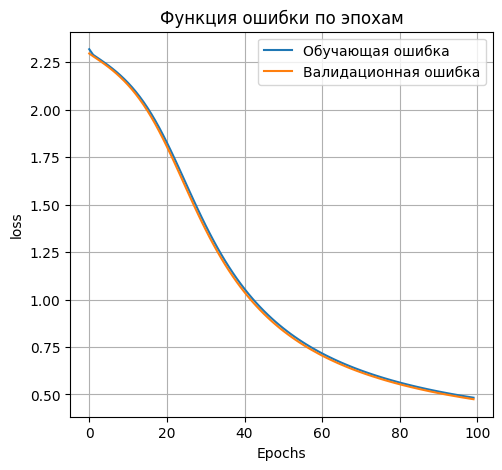

In [31]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(H_01_300_50.history['loss'], label='Обучающая ошибка')
plt.plot(H_01_300_50.history['val_loss'], label='Валидационная ошибка')
plt.title('Функция ошибки по эпохам')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)

In [32]:
scores_01_300_50=model_01_300_50.evaluate(X_test,y_test)
print('Loss on test data:',scores_01_300_50[0])
print('Accuracy on test data:',scores_01_300_50[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8761 - loss: 0.4844
Loss on test data: 0.4881931245326996
Accuracy on test data: 0.8740000128746033


In [33]:
model_01_300_100 = Sequential()
model_01_300_100.add(Dense(units=300, input_dim=num_pixels, activation='sigmoid'))
model_01_300_100.add(Dense(units=100, activation='sigmoid'))
model_01_300_100.add(Dense(units=num_classes, activation='softmax'))
model_01_300_100.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_01_300_100.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
H_01_300_100 = model_01_300_100.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=512
)

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.1070 - loss: 2.3687 - val_accuracy: 0.1328 - val_loss: 2.2869
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1536 - loss: 2.2832 - val_accuracy: 0.1165 - val_loss: 2.2717
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1559 - loss: 2.2679 - val_accuracy: 0.1893 - val_loss: 2.2564
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2401 - loss: 2.2525 - val_accuracy: 0.2463 - val_loss: 2.2406
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2753 - loss: 2.2360 - val_accuracy: 0.3690 - val_loss: 2.2241
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3593 - loss: 2.2189 - val_accuracy: 0.4323 - val_loss: 2.2067
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4321 - loss: 2.2018 - val_accuracy: 0.4517 - val_loss: 2.1882
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4562 - loss: 2.1821 - val_acc

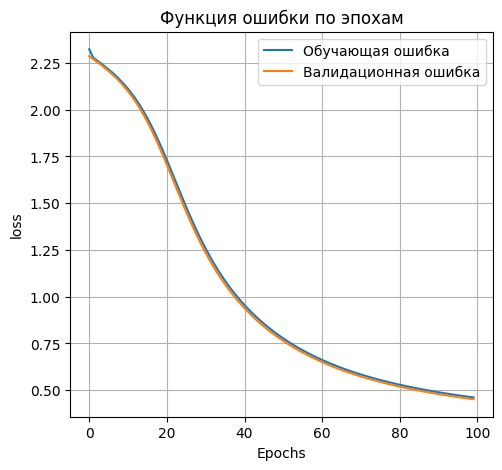

In [35]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(H_01_300_100.history['loss'], label='Обучающая ошибка')
plt.plot(H_01_300_100.history['val_loss'], label='Валидационная ошибка')
plt.title('Функция ошибки по эпохам')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)

In [36]:
scores_01_300_100=model_01_300_100.evaluate(X_test,y_test)
print('Loss on test data:',scores_01_300_100[0])
print('Accuracy on test data:',scores_01_300_100[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8814 - loss: 0.4605
Loss on test data: 0.4638420343399048
Accuracy on test data: 0.8795999884605408


In [37]:
model_01_300.save(filepath='best_model.keras')


In [38]:
from keras.models import load_model
model = load_model('best_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
NN output: [[6.7044683e-03 6.5092892e-05 8.0898860e-03 3.6560427e-04 4.4942164e-04
  1.0991883e-02 9.6887839e-01 3.7091802e-06 4.2457585e-03 2.0581596e-04]]


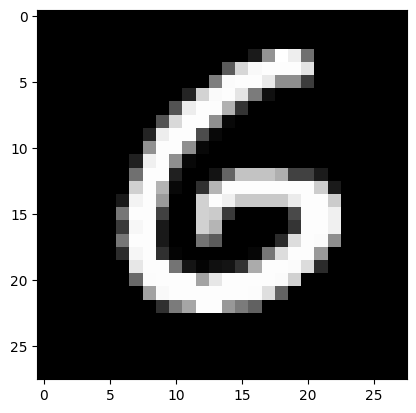

Real mark:  6
NN answer:  6


In [39]:
n = 123
result = model.predict(X_test[n:n+1])
print('NN output:', result)
plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
NN output: [[3.7733166e-04 3.6412096e-04 1.4499854e-03 9.2658949e-01 5.1390834e-04
  5.4276615e-02 3.5510810e-05 8.6189411e-04 1.2458544e-02 3.0724849e-03]]


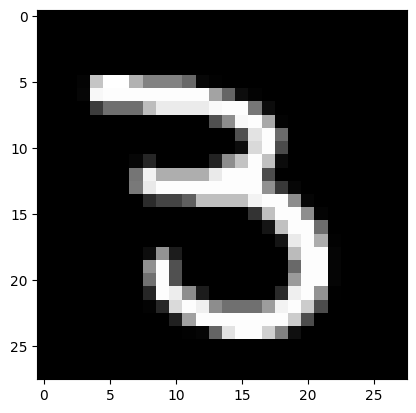

Real mark:  3
NN answer:  3


In [40]:
n = 765
result = model.predict(X_test[n:n+1])
print('NN output:', result)
plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ', str(np.argmax(y_test[n])))
print('NN answer: ', str(np.argmax(result)))

In [41]:
from PIL import Image
file_07_data = Image.open('7.png')
file_07_data = file_07_data.convert('L')
test_07_img = np.array(file_07_data)

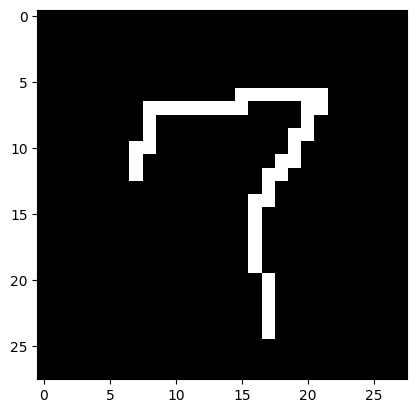

In [42]:
plt.imshow(test_07_img, cmap=plt.get_cmap('gray'))
plt.show()

In [43]:
test_07_img = test_07_img / 255
test_07_img = test_07_img.reshape(1, num_pixels)

In [44]:
result = model.predict(test_07_img)
print('I think it\'s ', np.argmax(result))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
I think it's  7


In [45]:
from PIL import Image
file_05_data = Image.open('5.png')
file_05_data = file_05_data.convert('L') # перевод в градации серого
test_05_img = np.array(file_05_data)

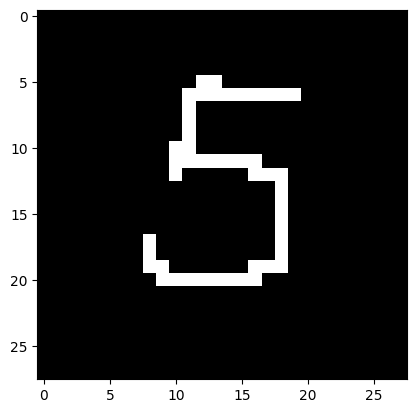

In [46]:
plt.imshow(test_05_img, cmap=plt.get_cmap('gray'))
plt.show()

In [47]:
test_05_img = test_05_img / 255
test_05_img = test_05_img.reshape(1, num_pixels)

In [48]:
result = model.predict(test_05_img)
print('I think it\'s ', np.argmax(result))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
I think it's  5


In [49]:
from PIL import Image
file_07_90_data = Image.open('7-90.png')
file_07_90_data = file_07_90_data.convert('L')
test_07_90_img = np.array(file_07_90_data)

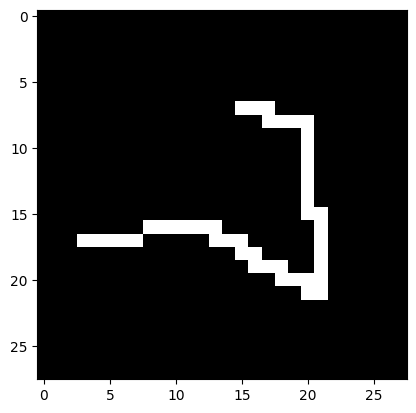

In [50]:
plt.imshow(test_07_90_img, cmap=plt.get_cmap('gray'))
plt.show()

In [51]:
test_07_90_img = test_07_90_img / 255
test_07_90_img = test_07_90_img.reshape(1, num_pixels)

In [52]:
result = model.predict(test_07_90_img)
print('I think it\'s ', np.argmax(result))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
I think it's  2


In [53]:
from PIL import Image
file_05_90_data = Image.open('5-90.png')
file_05_90_data = file_05_90_data.convert('L')
test_05_90_img = np.array(file_05_90_data)

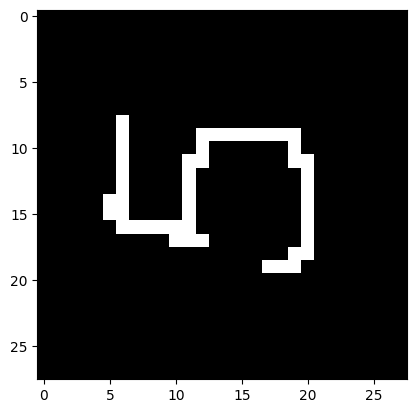

In [54]:
plt.imshow(test_05_90_img, cmap=plt.get_cmap('gray'))
plt.show()

In [55]:
test_05_90_img = test_05_90_img / 255
test_05_90_img = test_05_90_img.reshape(1, num_pixels)

In [56]:
result = model.predict(test_05_90_img)
print('I think it\'s ', np.argmax(result))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
I think it's  4
